In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np

In [3]:
df = pd.read_csv("/Users/vihitakesiraju/Documents/Training_Data-v3.csv")

In [4]:
corr_matrix = df.corr()
corr_matrix['AQI'].sort_values(ascending=False)

AQI        1.000000
PM10       0.895545
CO         0.477847
Precip     0.468865
PM2.5      0.462610
Speed      0.431296
RHMin      0.224172
SO2        0.185921
NO2        0.089975
Pb         0.050627
O3         0.021028
Season    -0.013202
WindDir   -0.015732
AirMin    -0.111012
Solar     -0.126420
AirMax    -0.209594
RHMax     -0.269235
Name: AQI, dtype: float64

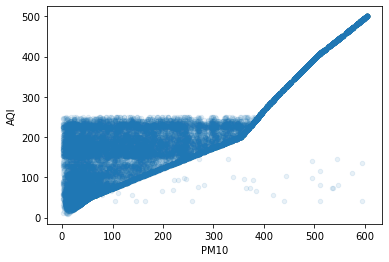

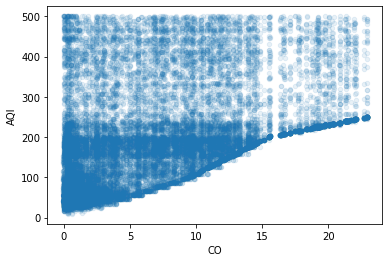

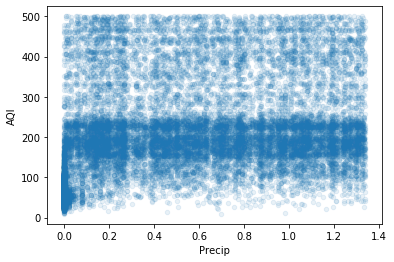

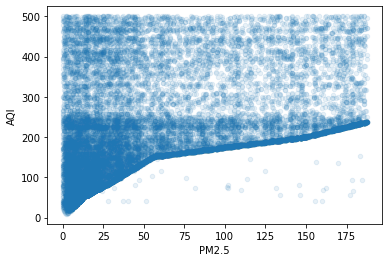

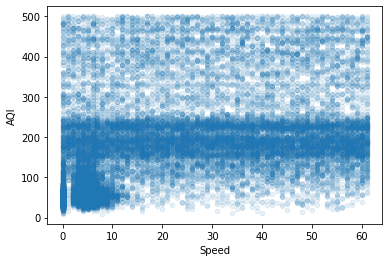

In [5]:
df.plot(kind="scatter",x = "PM10" , y = "AQI",alpha=0.1)
df.plot(kind="scatter",x = "CO" , y = "AQI",alpha=0.1)
df.plot(kind="scatter",x = "Precip" , y = "AQI",alpha=0.1)
df.plot(kind="scatter",x = "PM2.5" , y = "AQI",alpha=0.1)
df.plot(kind="scatter",x = "Speed" , y = "AQI",alpha=0.1)

In [6]:
labels = df['AQI']
df.drop(['AQI','Date'],axis=1,inplace=True)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df,labels,test_size = 0.3,random_state = 42)

In [13]:
param_grid = [
  {'C': [150000,160000],'kernel': ['rbf']}]
svmreg = SVR()
gridSearch = GridSearchCV(svmreg,param_grid,cv=5,scoring="neg_mean_squared_error")
gridSearch.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [150000, 160000], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [16]:
gridSearch.best_estimator_

SVR(C=150000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_train_pred=final_model.predict(X_train)
final_predictions=final_model.predict(X_test)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
train_mse=mean_squared_error(y_train,y_train_pred)
train_rmse=np.sqrt(train_mse)
train_accuracy=r2_score(y_train,y_train_pred)

In [18]:
print(train_accuracy)

0.9999993514807065
